In [126]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read csv files as pandas dataframe

In [127]:
population= pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/population.csv")
population.head()

,postcode,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,AL1 1,Total,5453,2715,2738,5408,45,75,225.63,24.2
1,AL1 2,Total,6523,3183,3340,6418,105,77,286.59,22.8
2,AL1 3,Total,4179,2121,2058,4100,79,46,97.12,43.0
3,AL1 4,Total,9799,4845,4954,9765,34,285,244.75,40.0
4,AL1 5,Total,10226,5129,5097,10211,15,133,200.93,50.9


In [128]:
road_nw= pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/roads_network.csv")
road_nw.head()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,POINT (-2.3501 56.603923),A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,POINT (-2.021334 57.130142),A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,POINT (-2.108598 57.146338),A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH
3,POINT (-2.093928 57.148218),A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL
4,POINT (-2.116089 57.131671),A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT


In [129]:
risk_index= pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/sample_submission.csv")
risk_index.head()

,postcode,Accident_risk_index
0,AB10 1AU,0
1,AB10 1PG,0
2,AB10 1TT,0
3,AB10 1YP,0
4,AB10 6LQ,0


In [130]:
accident_factors=pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/test.csv")
accident_factors.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,14,13,2,0,06-10-2013,6,13:28,218,E10000032,4,...,Daylight: Street light present,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom
1,17,13,2,0,22-04-2013,7,09:30,157,E10000034,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom
2,21,13,2,0,27-09-2013,3,19:10,155,E09000012,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom
3,23,13,2,0,13-03-2013,4,09:19,26,E10000016,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom
4,28,14,2,0,13-06-2013,1,14:59,6,E08000012,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom


In [132]:
accident_factors['Number_of_Casualties'].unique()
accident_factors['Number_of_Vehicles'].unique()

array([2, 3, 1, 4], dtype=int64)

In [78]:
accident_factors.dtypes

Accident_ID                                     int64
Police_Force                                    int64
Number_of_Vehicles                              int64
Number_of_Casualties                            int64
Date                                           object
Day_of_Week                                     int64
Time                                           object
Local_Authority_(District)                      int64
Local_Authority_(Highway)                      object
1st_Road_Class                                  int64
1st_Road_Number                                 int64
Road_Type                                      object
Speed_limit                                     int64
2nd_Road_Class                                  int64
2nd_Road_Number                                 int64
Pedestrian_Crossing-Human_Control              object
Pedestrian_Crossing-Physical_Facilities        object
Light_Conditions                               object
Weather_Conditions          

In [79]:
# Need to change the data types of some of the columns
accident_factors["Urban_or_Rural_Area"]=accident_factors["Urban_or_Rural_Area"].astype('category')

In [80]:
accident_factors["2nd_Road_Number"]= accident_factors["2nd_Road_Number"].astype('category')
accident_factors["2nd_Road_Class"]= accident_factors["2nd_Road_Class"].astype('category')

In [81]:
accident_factors["1st_Road_Number"]= accident_factors["1st_Road_Number"].astype('category')
accident_factors["1st_Road_Class"]= accident_factors["1st_Road_Class"].astype('category')

In [82]:
accident_factors["Local_Authority_(District)"]= accident_factors["Local_Authority_(District)"].astype('category')
accident_factors["Day_of_Week"]= accident_factors["Day_of_Week"].astype('category')
accident_factors["Accident_ID"]= accident_factors["Accident_ID"].astype(str)

In [83]:
# Date and time columns need to be converted to DateTime data type
accident_factors["Date"]= pd.to_datetime(accident_factors["Date"])
accident_factors["Time"]= pd.to_datetime(accident_factors["Time"]).dt.time

C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-04-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-09-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-03-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-06-2013' in DD/MM/YYYY format. Provide format or specif

In [84]:
# For checking the null values
accident_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_ID                                  121259 non-null  object        
 1   Police_Force                                 121259 non-null  int64         
 2   Number_of_Vehicles                           121259 non-null  int64         
 3   Number_of_Casualties                         121259 non-null  int64         
 4   Date                                         121259 non-null  datetime64[ns]
 5   Day_of_Week                                  121259 non-null  category      
 6   Time                                         121258 non-null  object        
 7   Local_Authority_(District)                   121259 non-null  category      
 8   Local_Authority_(Highway)                    121259 non-null  ob

There is no null value in any of the columns.

In [85]:
# Need to assign correct value for Day_of_Week based on the Date value
accident_factors["Day_of_Week"]= accident_factors["Date"].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

accident_factors["Day_of_Week"]= accident_factors["Day_of_Week"].apply(lambda x:days[x])

In [86]:
accident_factors.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,14,13,2,0,2013-06-10,Mon,13:28:00,218,E10000032,4,...,Daylight: Street light present,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom
1,17,13,2,0,2013-04-22,Mon,09:30:00,157,E10000034,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom
2,21,13,2,0,2013-09-27,Fri,19:10:00,155,E09000012,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom
3,23,13,2,0,2013-03-13,Wed,09:19:00,26,E10000016,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom
4,28,14,2,0,2013-06-13,Thu,14:59:00,6,E08000012,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom


In [87]:
# Channge the datatype of Local_authority District, Local_autority Highway to object from category
accident_factors["Local_Authority_(District)"]= accident_factors["Local_Authority_(District)"].astype(str)
accident_factors["Local_Authority_(Highway)"]= accident_factors["Local_Authority_(Highway)"].astype(str)

In [88]:
accident_factors.dtypes

Accident_ID                                            object
Police_Force                                            int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                            object
Time                                                   object
Local_Authority_(District)                             object
Local_Authority_(Highway)                              object
1st_Road_Class                                       category
1st_Road_Number                                      category
Road_Type                                              object
Speed_limit                                             int64
2nd_Road_Class                                       category
2nd_Road_Number                                      category
Pedestrian_Crossing-Human_Control                      object
Pedestri

In [89]:
# To check the unique values in each categorical column

In [90]:
accident_factors["Speed_limit"].unique()

array([60, 30, 40, 50, 20, 70], dtype=int64)

Speed limit column contains 6 unique values. Hence it can be considered as category 

In [91]:
accident_factors["Speed_limit"]=accident_factors["Speed_limit"].astype('category')

In [92]:
accident_factors["Road_Type"].unique()

array(['Single carriageway', 'Roundabout', 'Dual carriageway',
       'One way street', 'Unknown', 'Slip road'], dtype=object)

In [93]:
accident_factors["1st_Road_Class"].unique()

[4, 6, 3, 5, 1]
Categories (5, int64): [1, 3, 4, 5, 6]

In [94]:
accident_factors["1st_Road_Number"].unique()

[6358, 29, 5376, 1252, 1202, ..., 9097, 7816, 4430, 8698, 6496]
Length: 3827
Categories (3827, int64): [0, 1, 2, 3, ..., 9592, 9687, 9706, 9832]

In [95]:
# 1st class road number can be converted to object type
accident_factors["1st_Road_Number"]=accident_factors["1st_Road_Number"].astype(str)

In [96]:
accident_factors["2nd_Road_Class"].unique()

[6, -1, 3, 5, 4]
Categories (5, int64): [-1, 3, 4, 5, 6]

In [97]:
accident_factors["2nd_Road_Number"].unique()

[0]
Categories (1, int64): [0]

In [98]:
accident_factors["2nd_Road_Number"].values

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 121259
Categories (1, int64): [0]

All the values in 2nd class road number are zero, which do not make any impact on the output, 
Hence removing the column.

In [99]:
accident_factors.drop("2nd_Road_Number", axis=1, inplace=True)

In [100]:
accident_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_ID                                  121259 non-null  object        
 1   Police_Force                                 121259 non-null  int64         
 2   Number_of_Vehicles                           121259 non-null  int64         
 3   Number_of_Casualties                         121259 non-null  int64         
 4   Date                                         121259 non-null  datetime64[ns]
 5   Day_of_Week                                  121259 non-null  object        
 6   Time                                         121258 non-null  object        
 7   Local_Authority_(District)                   121259 non-null  object        
 8   Local_Authority_(Highway)                    121259 non-null  ob

In [101]:
accident_factors['Pedestrian_Crossing-Human_Control'].unique()

array(['None within 50 metres', 'Control by other authorised person',
       'Control by school crossing patrol'], dtype=object)

Can be converted to category as only 3 unique values are there

In [102]:
accident_factors['Pedestrian_Crossing-Human_Control']=accident_factors['Pedestrian_Crossing-Human_Control'].astype('category')

In [103]:
accident_factors['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['No physical crossing within 50 meters',
       'non-junction pedestrian crossing',
       'Pedestrian phase at traffic signal junction', 'Zebra crossing',
       'Central refuge', 'Footbridge or subway'], dtype=object)

In [104]:
# Convert to category
accident_factors['Pedestrian_Crossing-Physical_Facilities']=accident_factors['Pedestrian_Crossing-Physical_Facilities'].astype('category')

In [105]:
accident_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_ID                                  121259 non-null  object        
 1   Police_Force                                 121259 non-null  int64         
 2   Number_of_Vehicles                           121259 non-null  int64         
 3   Number_of_Casualties                         121259 non-null  int64         
 4   Date                                         121259 non-null  datetime64[ns]
 5   Day_of_Week                                  121259 non-null  object        
 6   Time                                         121258 non-null  object        
 7   Local_Authority_(District)                   121259 non-null  object        
 8   Local_Authority_(Highway)                    121259 non-null  ob

In [106]:
accident_factors['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkeness: No street lighting',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [107]:
#Convert to category
accident_factors['Light_Conditions']= accident_factors['Light_Conditions'].astype('category')

In [108]:
accident_factors['Weather_Conditions'].unique()

array(['Snowing without high winds', 'Fine without high winds',
       'Raining with high winds', 'Raining without high winds',
       'Fine with high winds', 'Other', 'Fog or mist', 'Unknown',
       'Snowing with high winds'], dtype=object)

In [109]:
# Convert to category
accident_factors['Weather_Conditions']= accident_factors['Weather_Conditions'].astype('category')

In [110]:
accident_factors['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', nan,
       'Flood (Over 3cm of water)'], dtype=object)

Road Surface Conditions column has 39 blank values. Need to fill blank values with np.nan.

In [111]:
accident_factors['Road_Surface_Conditions']= accident_factors['Road_Surface_Conditions'].replace("", np.nan)

In [112]:
accident_factors['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', nan,
       'Flood (Over 3cm of water)'], dtype=object)

Change the NaN values as "Not Reported"

In [113]:
accident_factors['Road_Surface_Conditions']= accident_factors['Road_Surface_Conditions'].replace(np.nan, "Not reported")

In [114]:
accident_factors['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Not reported',
       'Flood (Over 3cm of water)'], dtype=object)

In [115]:
accident_factors['Road_Surface_Conditions']=accident_factors['Road_Surface_Conditions'].astype("category")

In [116]:
accident_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_ID                                  121259 non-null  object        
 1   Police_Force                                 121259 non-null  int64         
 2   Number_of_Vehicles                           121259 non-null  int64         
 3   Number_of_Casualties                         121259 non-null  int64         
 4   Date                                         121259 non-null  datetime64[ns]
 5   Day_of_Week                                  121259 non-null  object        
 6   Time                                         121258 non-null  object        
 7   Local_Authority_(District)                   121259 non-null  object        
 8   Local_Authority_(Highway)                    121259 non-null  ob

In [117]:
accident_factors['Special_Conditions_at_Site'].unique()

array(['None', 'Roadworks',
       'Permanent sign or marking defective or obscured', 'Ol or diesel',
       'Auto traffic singal out', 'Road surface defective', 'Mud',
       'Auto traffic signal partly defective', nan], dtype=object)

Special conditions at site column has 10 blank values.
Need to replace with NaN
Replace NaN value with "Not Reported"

In [118]:
accident_factors['Special_Conditions_at_Site']=accident_factors['Special_Conditions_at_Site'].replace("", np.nan)

In [119]:
accident_factors['Special_Conditions_at_Site']=accident_factors['Special_Conditions_at_Site'].replace(np.nan, "Not reported")

In [120]:
accident_factors['Special_Conditions_at_Site'].unique()

array(['None', 'Roadworks',
       'Permanent sign or marking defective or obscured', 'Ol or diesel',
       'Auto traffic singal out', 'Road surface defective', 'Mud',
       'Auto traffic signal partly defective', 'Not reported'],
      dtype=object)

In [121]:
accident_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_ID                                  121259 non-null  object        
 1   Police_Force                                 121259 non-null  int64         
 2   Number_of_Vehicles                           121259 non-null  int64         
 3   Number_of_Casualties                         121259 non-null  int64         
 4   Date                                         121259 non-null  datetime64[ns]
 5   Day_of_Week                                  121259 non-null  object        
 6   Time                                         121258 non-null  object        
 7   Local_Authority_(District)                   121259 non-null  object        
 8   Local_Authority_(Highway)                    121259 non-null  ob

Time column has one value as blank

Time column has one blank value, need to convert to NaN and replace with value as "Not Reported"

In [122]:
accident_factors['Time']=accident_factors['Time'].replace("",np.nan)
accident_factors['Time']= accident_factors['Time'].replace(np.nan, "Not Reported")

In [123]:
accident_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_ID                                  121259 non-null  object        
 1   Police_Force                                 121259 non-null  int64         
 2   Number_of_Vehicles                           121259 non-null  int64         
 3   Number_of_Casualties                         121259 non-null  int64         
 4   Date                                         121259 non-null  datetime64[ns]
 5   Day_of_Week                                  121259 non-null  object        
 6   Time                                         121259 non-null  object        
 7   Local_Authority_(District)                   121259 non-null  object        
 8   Local_Authority_(Highway)                    121259 non-null  ob

# Add two new columns "Month" and "Season" for catgorizing the date by season

In [124]:
# Already imported datetime package
accident_factors['Month']= pd.DatetimeIndex(accident_factors['Date']).month
accident_factors

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,Month
0,14,13,2,0,2013-06-10,Mon,13:28:00,218,E10000032,4,...,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom,6
1,17,13,2,0,2013-04-22,Mon,09:30:00,157,E10000034,6,...,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom,4
2,21,13,2,0,2013-09-27,Fri,19:10:00,155,E09000012,3,...,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom,9
3,23,13,2,0,2013-03-13,Wed,09:19:00,26,E10000016,4,...,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom,3
4,28,14,2,0,2013-06-13,Thu,14:59:00,6,E08000012,4,...,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121254,599986,1,2,0,2013-05-07,Tues,18:31:00,6,E06000042,6,...,Fine without high winds,Wet/Damp,None,None,1,Yes,England,HD9 4AB,United Kingdom,5
121255,599990,62,2,0,2013-11-22,Fri,07:40:00,633,W06000004,3,...,Raining without high winds,Wet/Damp,None,None,1,Yes,Alba / Scotland,AL2 1FS,United Kingdom,11
121256,599991,13,2,0,2013-12-10,Tues,08:26:00,143,E10000034,3,...,Fine without high winds,Dry,Roadworks,None,2,Yes,England,BN3 3WA,United Kingdom,12
121257,599993,1,2,0,2013-05-06,Mon,22:54:00,7,E09000016,6,...,Fine without high winds,Wet/Damp,Roadworks,None,1,Yes,England,DL14 8HH,United Kingdom,5


In [125]:
accident_factors['Number_of_Casualties'].unique()

array([0], dtype=int64)

In [53]:
# Converting month number to month name
import calendar

In [54]:
accident_factors['Month']= accident_factors['Month'].apply(lambda x: calendar.month_abbr[x])

In [55]:
accident_factors['Month']

0         Jun
1         Apr
2         Sep
3         Mar
4         Jun
         ... 
121254    May
121255    Nov
121256    Dec
121257    May
121258    Aug
Name: Month, Length: 121259, dtype: object

In [56]:
# create season column based on month 

In [57]:
season = {'Jan': 'Winter',
          'Feb': 'Winter',
          'Mar': 'Spring', 
          'Apr': 'Spring',
          'May': 'Spring',
          'Jun': 'Summer',
          'Jul': 'Summer',
          'Aug': 'Summer',
          'Sep': 'Autumn',
          'Oct': 'Autumn',
          'Nov': 'Autumn',
          'Dec': 'Winter'}
accident_factors['Season']= accident_factors['Month'].apply(lambda y: season[y])

In [58]:
accident_factors['Season']

0         Summer
1         Spring
2         Autumn
3         Spring
4         Summer
           ...  
121254    Spring
121255    Autumn
121256    Winter
121257    Spring
121258    Summer
Name: Season, Length: 121259, dtype: object

In [59]:
accident_factors['Season'].unique()

array(['Summer', 'Spring', 'Autumn', 'Winter'], dtype=object)

# To categorize the time into different categorization of a day

In [60]:
accident_factors['Time']= accident_factors['Time'].replace("",np.nan)

One value of Time is not available and is displayed as blank. 


In [61]:
accident_factors[accident_factors['Time'].isna()]

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,Month,Season


Added a new column "Day_cls" based on time of day (Morning, Afternoon, Eveng and Night) according to time interval

In [62]:
# A function to categorize the time interval
#def day_partition(x):
#    if (x>=pd.datetime.datetime() & (x<pd.to_datetime(06:00:00)) & (x>21):
#        Day_cls='night'
#    elif (x>=6) & (x<12):
#        Day_cls='morning'
#    elif (x>=12) & (x<18):
#        Day_cls='afternoon'
#    else:
#        Day_cls='evening'
#    return Day_cls

In [63]:
accident_factors['Number_of_Casualties'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0         0
1         0
2         0
3         0
4         0
         ..
121254    0
121255    0
121256    0
121257    0
121258    0
Name: Number_of_Casualties, Length: 121259, dtype: int64>

Number_of_Casualties column have all the values as zero, doesn't make any impact on the analysis. Hence dropping the column

In [64]:
accident_factors.drop("Number_of_Casualties", axis=1, inplace= True)

In [65]:
accident_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_ID                                  121259 non-null  object        
 1   Police_Force                                 121259 non-null  int64         
 2   Number_of_Vehicles                           121259 non-null  int64         
 3   Date                                         121259 non-null  datetime64[ns]
 4   Day_of_Week                                  121259 non-null  object        
 5   Time                                         121259 non-null  object        
 6   Local_Authority_(District)                   121259 non-null  object        
 7   Local_Authority_(Highway)                    121259 non-null  object        
 8   1st_Road_Class                               121259 non-null  ca

## Data Visualization for initial analysis

In [66]:
#hour = []
#for x in accident_factors['Time']:
 #   hour.append(x.hour)
#hour

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


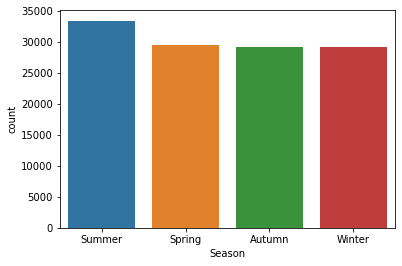

In [67]:
# Count plot for categorizing the data by season
sns.countplot(accident_factors['Season'])
plt.show()


C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


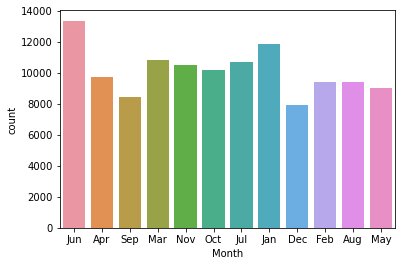

In [68]:
# Hist plot for categorizing the data by month
sns.countplot(accident_factors['Month'])
plt.show()

In [72]:
accident_factors['postcode'].nunique()

49772